### 0.0 Imports

In [2]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

0.1 Helper Functions

0.2 Loading data

In [3]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_stores_raw = pd.read_csv('data/store.csv', low_memory=False)

# Merge dos dois arquivos: sales e stores tendo como chave a coluna store
df_raw = pd.merge(df_sales_raw, df_stores_raw, how='left', on='Store')

### 1.0 Descrição dos dados

In [4]:
# Faz uma cópia dos dados, para facilitar no futuro em caso de necessidade de rodar o código novamente
df1 = df_raw.copy()

In [5]:
# Exibe o nome das colunas originais para que possamos copiar
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# 1.1 Rename Columns

In [6]:
# Nome antigo das colunas
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

# Cria uma função lambda para renomear as colunas antigas, com letra minuscula no inicio e underscore entre nomes
snakecase = lambda x: inflection.underscore( x )

# Aplica a função sobre a lista cols_old
cols_new = list( map ( snakecase, cols_old ) ) 

# Rename 
df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

# 1.2. Data Dimensions
- Qual a quantidade de linhas e colunas do dataset?

In [8]:
# Exibe número de linhas e colunas do df pelo método shape
print ( 'Number of Rows: {}'.format( df1.shape[0]) )
print ( 'Number of Columns: {}'.format( df1.shape[1]) )

Number of Rows: 1017209
Number of Columns: 18


# 1.3 Data Types

In [9]:
# Exibe o tipo de dados do dataframe
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
# Como a data está em string, vamos mudar para date
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 1.4. Check NA

In [11]:
# Exibe a soma de dados faltantes 
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# 1.5. Fillout NA
- Solucionando dados NA. Vamos analisar cada uma das colunas com NAs entendendo o significado do dado e sua 
importância no problema de negócio. 

In [12]:
# Verifica valor máximo da distância do competidor mais próximo antes do tratamento
df1['competition_distance'].max()

75860.0

Coluna Competition_distance: é a distância do competidor mais próximo. 

- Solução: se essa coluna está vazia, é porque não tenho um competidor mais próximo ou esse competidor está tão distante que não é relevante. Podemos então colocar valores acima da máxima distância observada para um próximo competidor. 

- Vamos utilizar o método math.isnan, presente na biblioteca math (temos que colocar um import math no código). Esse método informa se a coluna tem dados faltantes.

- Vamos verificar o valor máximo até o competidor mais próximo usando o método df1[‘competition_distance’].max()

- O valor retornado foi de 75860. Então, colocaremos um valor muito mais alto na coluna quando estiver um dado faltante (200000). Se não tivermos um valor faltante na coluna, retornaremos o valor que já existia. 

In [13]:
# Função para atribuir ao campo competition_distance que estiver com dado faltante um valor acima da máxima distância do competidor
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )  

In [14]:
# Verifica os dados faltantes após aplicação da função
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Coluna Competition_open_since_month: mês que o competidor mais próximo foi aberto

- Há duas razões para esse campo estar vazio: não há um competidor mais próximo; a loja tem um competidor mas não sabemos quando ela abriu (ela abriu antes da nossa loja ou alguém se esqueceu de anotar).

- Solução: se esse campo for vazio, vou copiar o mês da venda naquela determinada linha e incluir no campo “competition_open_since_month.

- Parece ilógica essa ideia, mas a questão é que na parte de machine learning, esse tempo de existência do competidor será importante. Como não sabemos exatamente quando ele se instalou, temos que a existência de dados em competition_distance é uma garantia de que há um competidor. Logo, a data da venda é uma garantia mínima em termos de data para saber que havia um competidor.

- Utilizaremos novamente funções lambda. A lógica é: se o campo naquela linha tiver dado faltante, ele pegará o mês da data de venda e substituirá esse valor faltante. Se não for faltante, continua com o valor de ‘competition_open_since_month’. Isso será aplicado para todas as colunas‘competition_open_since_month’ em todas as linhas do df1. Para isso, o apply será para todo o df1. Como vou alterar apenas essa coluna específica, informo no início da linha de código. Ao final, especifico axis=1 pois trabalharei com mais de uma coluna

In [15]:
# Tratando os dados faltantes em competition_open_since_month 
df1['competition_open_since_month'] = df1.apply ( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1)

- Coluna competition_open_since_year: mesma ideia da coluna anterior, porém, aplicado ao ano

In [16]:
# Tratando competition_open_since_year
df1['competition_open_since_year'] = df1.apply ( lambda x: x['date'].month if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 )


Coluna promo2_since_week

- Esse campo descreve o ano e a semana do calendário que a loja começou a participar da promo2. A promo2 é a continuação de uma promoção feita em algumas lojas. Algumas lojas entram nessa segunda promoção, outras não (ficam apenas na primeira promoção). 

- Se os dados forem NA, a loja decidiu não participar da continuação da promoção ou não temos essa semana que ela iniciou a participação informada.
 
- Solução: vamos fazer como na ‘competition_open_since_month’. Vamos substituir esse dado faltante para o valor da semana da data da venda. O código é o mesmo. Vamos apenas substituir mês por semana.

In [17]:
# Tratando os dados faltantes em promo2_since_week
df1['promo2_since_week'] = df1.apply ( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )         

In [18]:
# Tratando os dados faltantes em promo2_since_year
df1['promo2_since_year'] = df1.apply ( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )    

Coluna Promo_interval: mostra os meses que se iniciaram promoções durante o ano. Por exemplo, se uma promoção se iniciou em setembro, novembro e dezembro, nessa coluna esses meses estará listados de forma abreviada.

- Se estiver com dado faltante, significa que não houve nenhum mês com promoção ou então se esqueceu de informar. Vamos fazer o seguinte nesse caso: o mês informado na data de venda será convertido de número para abreviação do mês referente. 

- Vamos criar colunas auxiliares (dicionarios com chave e valor) que substituirão 1 por jan; 2 por fev; 3 por mar, e assim por diante. Isso será importante para pegarmos o mês da data e informar na coluna. 

- Vamos colocar zero onde tiver dados faltantes em promo_interval

- Criaremos uma coluna que recebe o nome do mês da data de venda, utilizando esse dicionário com chave e valor.

- Agora, teremos que conferir se o mês da data está no intervalo da coluna promo_interval que não tem dado faltante.

In [19]:
# Tratando os dados faltantes em promo_interval

# Criando um dicionário para fazermos o mapeamento do nome dos meses 
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Set', 10: 'Oct', 11: 'Nov', 12: 'Dez'}

# Colocar zeros onde tiver dado faltante
df1['promo_interval'].fillna( 0, inplace=True )

# Cria nova coluna que recebe o nome do mês da data de venda, com base no mapeamento
df1['month_map'] = df1['date'].dt.month.map( month_map )


In [20]:
# Conferindo o resultado do código
df1.sample(5).T

,616069,324428,906261,718780,672492
store,260,199,552,391,933
day_of_week,4,7,3,3,3
date,2013-12-26 00:00:00,2014-09-28 00:00:00,2013-04-10 00:00:00,2013-09-25 00:00:00,2013-11-06 00:00:00
sales,0,0,9855,5206,9137
customers,0,0,848,638,1076
open,0,0,1,1,1
promo,0,0,1,1,1
state_holiday,c,0,0,0,0
school_holiday,1,0,0,0,0
store_type,a,d,a,a,a


- Temos um campo para o nome do mês baseado na data. Precisamos verificar se esse mês está dentro do intervalo informado em promo interval. 
Se sim, então na data dessa venda estava dentro de uma promoção. 
- Vamos criar um campo para informar se havia promoção ou não na data da venda. 0 para não; 1 para sim

In [21]:
# Cria uma coluna para verificar se no mês da venda havia promoção
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1 )

In [22]:
# Conferindo o resultado do código
df1.sample(5).T

,337666,410159,796863,921667,519395
store,368,625,424,348,591
day_of_week,7,7,3,3,7
date,2014-09-14 00:00:00,2014-06-29 00:00:00,2013-07-17 00:00:00,2013-03-27 00:00:00,2014-03-23 00:00:00
sales,0,0,7283,9948,0
customers,0,0,773,811,0
open,0,0,1,1,0
promo,0,0,1,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,1,0
store_type,d,a,d,a,a


In [23]:
# Confere os dados faltantes no em todo o df para verificar o resultado das operações
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

# 1.6. Change Types

In [24]:
# Confere o tipo de dados
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [25]:
# Transformação de dados nas colunas que alteramos
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

# Confere as alterações
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7. Descriptive Estatistical

- Criaremos um dataset para os dados numéricos e um dataset para os dados categóricos para possibilitar a análise estatística

In [26]:
num_attributes = df1.select_dtypes( include=['int64', 'int32', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'int32', 'float64', 'datetime64[ns]'] )

1.7.1. Numerical Attributes

In [27]:
# Medidas de tendência central: média, mediana
tc1 = pd.DataFrame( num_attributes.apply( np.mean) ).T
tc2 = pd.DataFrame( num_attributes.apply( np.median )).T

# Medidas de dispersão: std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis())).T

# Concatenar
metrics = pd.concat( [d2, d3, d4, tc1, tc2, d1, d5, d6] ).T.reset_index()
metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
metrics


,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1.0,2015.0,2014.0,1372.032482,2006.0,932.640284,-0.782151,-1.388100


C:\Users\giova\AppData\Local\Temp\ipykernel_64840\2256001653.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1['sales'] )


<Axes: xlabel='sales', ylabel='Density'>

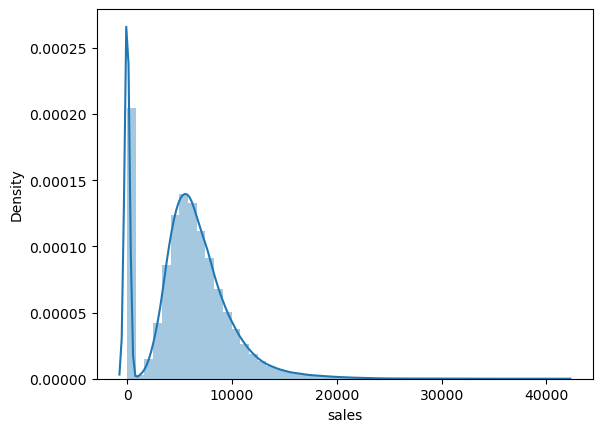

In [28]:
# Plotar gráfico de distribuição de sales
sns.distplot( df1['sales'] )

C:\Users\giova\AppData\Local\Temp\ipykernel_64840\2493394500.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1['competition_distance'] )


<Axes: xlabel='competition_distance', ylabel='Density'>

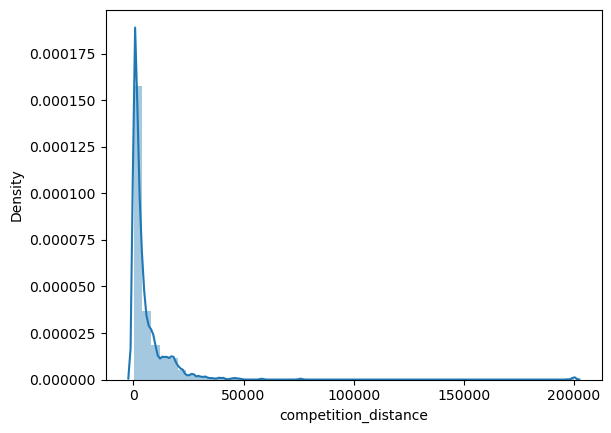

In [29]:
# Plotar distribuição da distância dos competidores
sns.distplot( df1['competition_distance'] ) 

- Observa-se uma grande concentração dos competidores próximos à loja. 

1.7.2. Categorical Attributes

In [30]:
# Analise dos dados categóricos
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

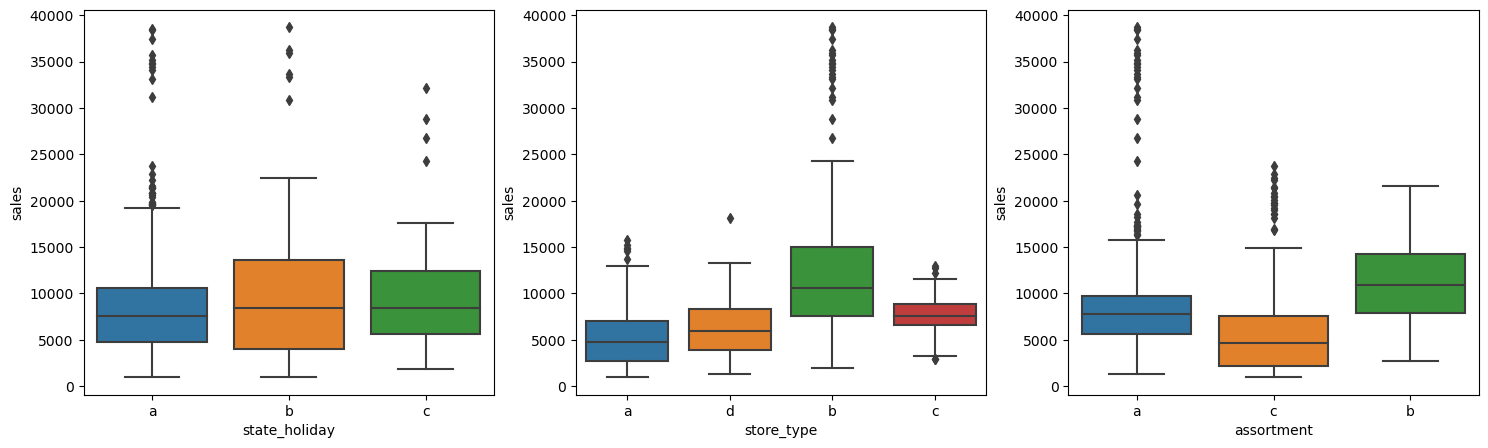

In [40]:
# Filtra os dados a serem exibidos no boxplot
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]


plt.figure(figsize=(18,5))

# Constroi box plot dos state_holydar x sales
plt.subplot(1, 3, 1)

sns.boxplot( x = 'state_holiday', y='sales', data=aux1)

# Constroi box plot dos store_type x sales
plt.subplot(1, 3, 2)

sns.boxplot( x = 'store_type', y='sales', data=aux1)


# Constroi box plot dos assortment x sales
plt.subplot(1, 3, 3)

sns.boxplot( x = 'assortment', y='sales', data=aux1)

Análise: 
Vendas em relaçaõ ao feriado estadual
- Mediana no feriado B é maior que a do A, e muito próxima do feriado C. 
- Há um equilíbrio de A e B das vendas entre o quartil 25 e 50. 
- Em A e B, há equilíbrio do número de vendas entre os quartis 25 e 50, e 50 e 75
- Em C, a maior parte das vendas se concentram entre o quartil 50 e 75 

Análise:
Vendas em relação ao tipo de loja
- O tipo de loja B possui número de vendas com maior mediana, além de maior concentração de outliers em valores superiores. 
- Essa loja também possui maior concentração de vendas acima do quartil 50. 
- Isso mostra que, de fato, é uma loja com média de vendas bem superior às demais. 
- Em segundo lugar de vendas, temos C, onde há maior concentração das vendas em torno da mediana. 

Análise: Mix de produtos
- O mix de produtos B tem valor de vendas com mediana superior aos demais. 
- Nos três mix, há concentração em torno da mediana, com C tendo menor mediana e A com maior número de outliers em valores superiores. 